In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.feature_selection import RFECV

In [2]:
data = pd.read_csv("../../framingham_heart_study.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
data.shape

(4240, 16)

In [7]:
pd.isnull(data).values.any()

True

In [8]:
pd.isnull(data).values.sum()

645

In [9]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
# new_data = data.dropna()
new_data = data.fillna(method='bfill', axis=0) # replacing missing values with value in next row
# new_data = data.fillna(method='bfill', axis=0) # replacing missing values with the mean

In [11]:
pd.isnull(new_data).values.sum()

0

In [12]:
new_data.shape

(4240, 16)

In [13]:
new_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


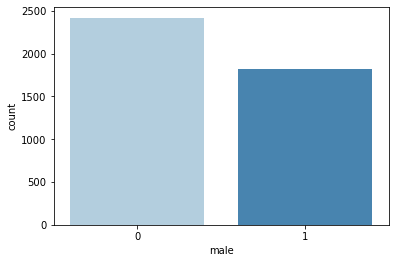

In [14]:
sns.countplot(x="male", data=new_data, palette="Blues")

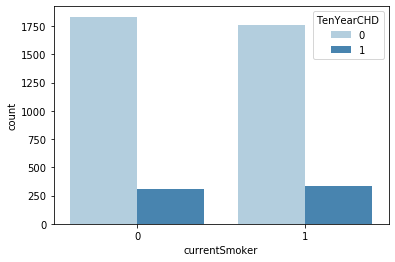

In [15]:
# sns.countplot(x="currentSmoker", data=new_data, palette="husl", hue="currentSmoker")
sns.countplot(x="currentSmoker", data=new_data, palette="Blues", hue="TenYearCHD")

In [16]:
# current smoker counts
data['currentSmoker'].value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

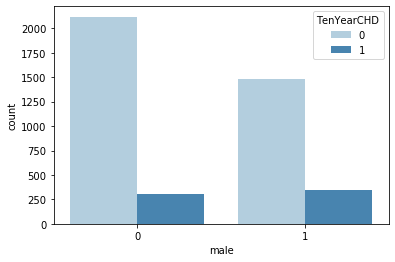

In [17]:
# gender and target variable counts
sns.countplot(x="male", data=new_data, palette="Blues", hue="TenYearCHD")

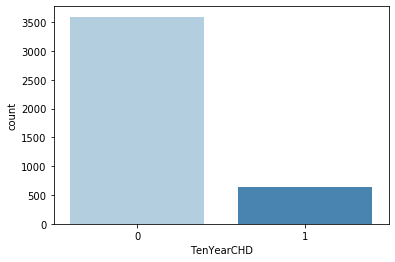

In [18]:
# target variable counts
sns.countplot(x="TenYearCHD", data=new_data, palette="Blues")

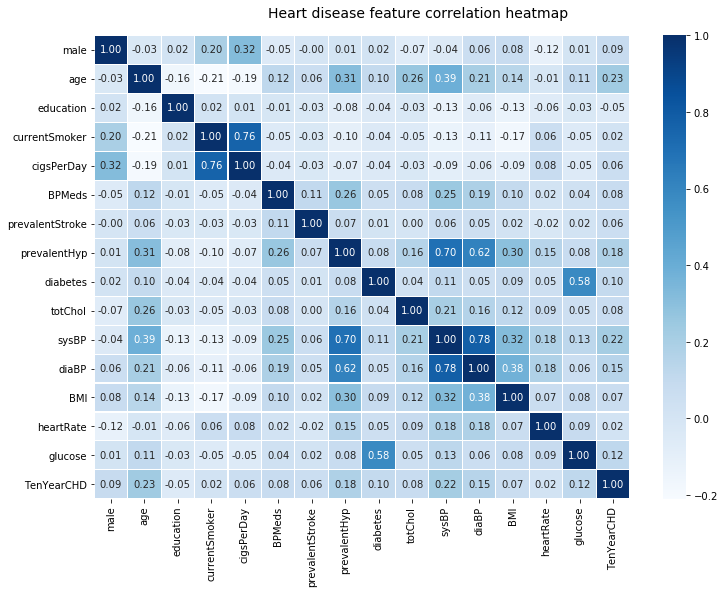

In [19]:
# Feature correlation matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
corr = new_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease feature correlation heatmap', fontsize=14)

In [20]:
# separating X and y variables
X = new_data.drop(['TenYearCHD'], axis=1)
y = new_data['TenYearCHD']

In [21]:
X.shape, y.shape

((4240, 15), (4240,))

In [22]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,107.0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [23]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [24]:
# separating the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [25]:
# classifier
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
y_pred = svm_clf.predict(X_test)

In [27]:
# accuracy before balancing the dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8616352201257862


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1094
           1       1.00      0.01      0.02       178

    accuracy                           0.86      1272
   macro avg       0.93      0.51      0.47      1272
weighted avg       0.88      0.86      0.80      1272



In [29]:
# the confusion matrix shows that the model is biased because the dataset is not balanced,
# so we balance the dataset using SMOTE
print(confusion_matrix(y_test, y_pred))

[[1094    0]
 [ 176    2]]


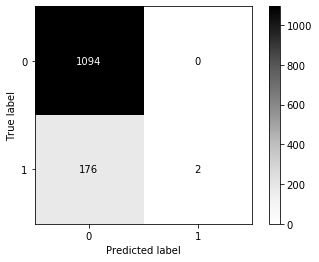

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Greys)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
# This cm shows that the model is highly biased to the negative class due to class imbalance, 
# so we have to balance the dataset to avoid overfitting.

In [31]:
# oversampling with SMOTE to avoid overfitting the model
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(random_state=100)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [32]:
print("After oversampling, shape of train x: ", X_train_res.shape)
print("After oversampling, shape of train y: ", y_train_res.shape)

After oversampling, shape of train x:  (5004, 15)
After oversampling, shape of train y:  (5004,)


In [33]:
# fitting svm classifier after oversampling
svm_clf.fit(X_train_res, y_train_res)

SVC(kernel='linear')

In [34]:
y_pred_res = svm_clf.predict(X_test)

In [35]:
# model accuracy after class is balanced (accuracy reduces to 67%)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_res))
print("***************************************************")
print(classification_report(y_test, y_pred_res))

Accuracy: 0.6650943396226415
***************************************************
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1094
           1       0.21      0.51      0.30       178

    accuracy                           0.67      1272
   macro avg       0.55      0.60      0.54      1272
weighted avg       0.80      0.67      0.71      1272



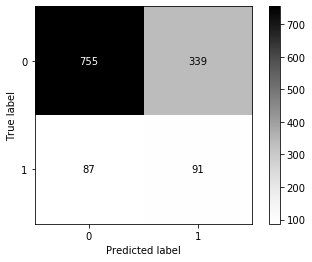

In [36]:
plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Greys)  # doctest: +SKIP
plt.show()

In [37]:
# feature selection with recursive feature selection with cross validation

In [38]:
rfe_cv = RFECV(estimator=svm_clf, step=1, cv=8, scoring="accuracy")
rfe_cv = rfe_cv.fit(X_train_res, y_train_res)

In [39]:
print("Optimal number of features: ", rfe_cv.n_features_)
print("Best features: ", X_train.columns[rfe_cv.support_])

Optimal number of features:  14
Best features:  Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')


In [40]:
rfe_cv.grid_scores_

array([0.54306137, 0.53940028, 0.5390516 , 0.60216179, 0.63720363,
       0.65184798, 0.66422594, 0.67050209, 0.68078801, 0.68549512,
       0.68288006, 0.68514644, 0.68497211, 0.68549512, 0.68497211])

In [41]:
rfe_cv.ranking_

array([1, 1, 1, 1, 1, 1, 6, 1, 1, 5, 1, 1, 2, 4, 3])

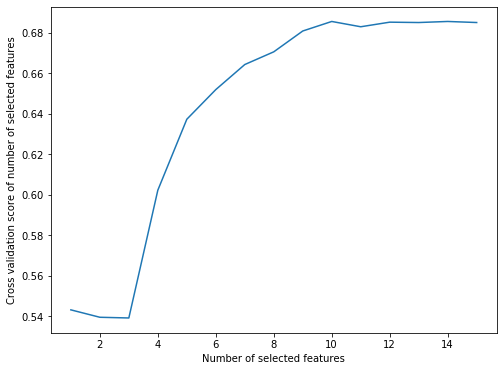

In [42]:
plt.figure(figsize=(8,6))
plt.xlabel("Number of selected features")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfe_cv.grid_scores_)+1), rfe_cv.grid_scores_)
plt.show()

In [43]:
# transform the newly selected features
x_train_rfecv = rfe_cv.transform(X_train_res)
x_test_rfecv = rfe_cv.transform(X_test)

In [44]:
svm_rfecv_model = svm_clf.fit(x_train_rfecv, y_train_res)

In [45]:
def generate_accuracy_and_heatmap(model, x, y):
    ac = metrics.accuracy_score(y, model.predict(x))
    f_score = metrics.f1_score(y, model.predict(x))
    
    print("Accuracy: ", ac)
    print("F1 score: ", f_score)
    print("\n")
    print(pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                     pd.Series(y['Outcome'], name='Actual')))
    return 1

In [46]:
y_pred_rfecv = svm_clf.predict(x_test_rfecv)

In [47]:
# model accuracy after class is balanced (accuracy reduces to 75%)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfecv))
print("***************************************************")
print(classification_report(y_test, y_pred_rfecv))

Accuracy: 0.6485849056603774
***************************************************
              precision    recall  f1-score   support

           0       0.89      0.67      0.77       728
           1       0.21      0.52      0.29       120

    accuracy                           0.65       848
   macro avg       0.55      0.59      0.53       848
weighted avg       0.80      0.65      0.70       848



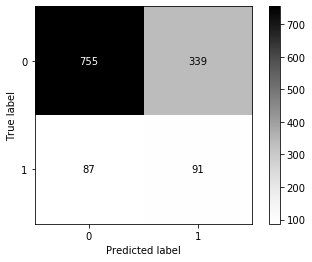

In [48]:
plot_confusion_matrix(svm_rfecv_model, x_test_rfecv, y_test, cmap="Greys")

In [49]:
generate_accuracy_and_heatmap(svm_rfecv_model, x_test_rfecv, y_test)

Accuracy:  0.6650943396226415
F1 score:  0.2993421052631579




KeyError: 'Outcome'